In [1]:
# libraries Import in the python environment. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
## Data Availablity

customers = pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\Ajio\Ajio\customer.csv")
delivery = pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\Ajio\Ajio\delivery.csv")
orders = pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\Ajio\Ajio\orders.csv")
products = pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\Ajio\Ajio\products.csv")
ratings = pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\Ajio\Ajio\ratings.csv")
returns = pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\Ajio\Ajio\returns.csv")
transanctions = pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\Ajio\Ajio\transaction.csv")

In [7]:
# data

customers.head(3)

,C_ID,C_Name,Gender,Age,City,State,Street_Address,Mobile
0,CS_11000001,Manbir Lala,Male,67,Delhi,Delhi,"Park Ave, 163 , Delhi , Delhi - 529675",9607971039
1,CS_11000002,Radhika More,Female,51,Pune,Maharashtra,"Elm St, 960 , Pune , Maharashtra - 328062",9109249091
2,CS_11000003,Faqid Halder,Female,57,Bengaluru,Karnataka,"Maple St, 71 , Bengaluru , Karnataka - 574209",9129509047


In [9]:
delivery.head(3)

,DP_ID,DP_name,DP_Ratings,Percent_Cut
0,DV_61000001,Delhivery,5,25
1,DV_61000002,Ecom Express,4,20
2,DV_61000003,Blue Dart,4,25


In [11]:
orders.head(3)

,Or_ID,C_ID,P_ID,Order_Date,Order_Time,Qty,Coupon,DP_ID,Discount
0,OR_31000001,CS_11005317,PD_21001301,2024-02-27,22:02:00,1,No Coupon,DV_61000001,0
1,OR_31000002,CS_11000423,PD_21003593,2024-01-21,08:33:31,5,PULL,DV_61000002,25
2,OR_31000003,CS_11001042,PD_21004315,2024-09-22,17:26:05,1,No Coupon,DV_61000002,0


In [13]:
products.head(3)

,P_ID,P_Name,Category,Company_Name,Gender,Price
0,PD_21000001,Distressed Stretch Denim Charcoal Faded Jeans,Jeans,Puma,Unisex,1589
1,PD_21000002,Straight Leg Cotton Blend Light Blue Faded Jeans,Jeans,Gap,Men,2211
2,PD_21000003,Single-Breasted Cashmere Gray Houndstooth Blazer,Blazer,Reebok,Unisex,2797


In [15]:
ratings.head(3)

,R_ID,Or_ID,Prod_Rating,Delivery_Service_Rating
0,RT_101000001,OR_31009479,4,5
1,RT_101000002,OR_31001385,2,2
2,RT_101000003,OR_31005731,5,1


In [17]:
returns.head(3)

,RT_ID,Or_ID,Reason,Return_Refund,Dates
0,RR_301000001,OR_31004141,Wrong Item Shipped,Approved,2023-04-08
1,RR_301000002,OR_31008145,Late Delivery,Rejected,2024-05-13
2,RR_301000003,OR_31005212,Wrong Item Shipped,Approved,2023-11-01


In [19]:
transanctions.head(3)

,Tr_ID,Or_ID,Transaction_Mode,Reward
0,TR_41000001,OR_31002037,Wallet,No
1,TR_41000002,OR_31008376,Wallet,Yes
2,TR_41000003,OR_31002152,UPI,No


### Data Combining

In [26]:
final_data = pd.merge( left = orders , right = customers , on = 'C_ID' , how = 'inner')
final_data = pd.merge( left= orders , right = products , on = 'P_ID' , how = 'inner' )
final_data = pd.merge( left = orders , right = ratings , on = 'Or_ID' , how = 'inner' )
final_data = pd.merge( left = orders , right = delivery , on = 'DP_ID' , how = 'inner')
final_data = pd.merge( left = orders , right = returns , on = 'Or_ID' , how = 'inner' )
final_data = pd.merge( left = orders , right = transanctions , on = 'Or_ID' , how = 'inner')

In [28]:
final_data.head()

,Or_ID,C_ID,P_ID,Order_Date,Order_Time,Qty,Coupon,DP_ID,Discount,Tr_ID,Transaction_Mode,Reward
0,OR_31000001,CS_11005317,PD_21001301,2024-02-27,22:02:00,1,No Coupon,DV_61000001,0,TR_41004226,UPI,Yes
1,OR_31000004,CS_11004079,PD_21007443,2023-05-26,03:15:48,10,AGREEMENT,DV_61000003,10,TR_41004874,Debit Card,No
2,OR_31000005,CS_11009894,PD_21007621,2023-10-26,04:02:44,7,WINDOW,DV_61000001,10,TR_41007053,Wallet,Yes
3,OR_31000006,CS_11004976,PD_21002407,2023-12-09,07:58:24,1,FALL,DV_61000003,25,TR_41009182,Net Banking,No
4,OR_31000007,CS_11009282,PD_21005526,2023-05-12,23:40:21,9,TEAM,DV_61000002,25,TR_41001808,Net Banking,No


## EDA | Exploratory Data Analysis

In [31]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Or_ID             10000 non-null  object
 1   C_ID              10000 non-null  object
 2   P_ID              10000 non-null  object
 3   Order_Date        10000 non-null  object
 4   Order_Time        10000 non-null  object
 5   Qty               10000 non-null  int64 
 6   Coupon            10000 non-null  object
 7   DP_ID             10000 non-null  object
 8   Discount          10000 non-null  int64 
 9   Tr_ID             10000 non-null  object
 10  Transaction_Mode  10000 non-null  object
 11  Reward            10000 non-null  object
dtypes: int64(2), object(10)
memory usage: 937.6+ KB


* Total Num of records :- 1000
* Total Num of Variables :- 12
* No Missing Data Found in the cols
* Variables comprises of int64 and object data type

In [64]:
# converting order date into date time format

final_data['Order_Date'] = pd.to_datetime( final_data.Order_Date , format = '%Y-%m-%d' ) 

In [66]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Or_ID             10000 non-null  object        
 1   C_ID              10000 non-null  object        
 2   P_ID              10000 non-null  object        
 3   Order_Date        10000 non-null  datetime64[ns]
 4   Order_Time        10000 non-null  object        
 5   Qty               10000 non-null  int64         
 6   Coupon            10000 non-null  object        
 7   DP_ID             10000 non-null  object        
 8   Discount          10000 non-null  int64         
 9   Tr_ID             10000 non-null  object        
 10  Transaction_Mode  10000 non-null  object        
 11  Reward            10000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 937.6+ KB


In [72]:
# converting order time into time format.

final_data['Order_Time'] = pd.to_datetime( final_data.Order_Time , format = '%H:%M:%S' )

In [74]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Or_ID             10000 non-null  object        
 1   C_ID              10000 non-null  object        
 2   P_ID              10000 non-null  object        
 3   Order_Date        10000 non-null  datetime64[ns]
 4   Order_Time        10000 non-null  datetime64[ns]
 5   Qty               10000 non-null  int64         
 6   Coupon            10000 non-null  object        
 7   DP_ID             10000 non-null  object        
 8   Discount          10000 non-null  int64         
 9   Tr_ID             10000 non-null  object        
 10  Transaction_Mode  10000 non-null  object        
 11  Reward            10000 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 937.6+ KB


## Outliers Detection

In [76]:
numerical = final_data.select_dtypes('int64')
numerical.head(5)

,Qty,Discount
0,1,0
1,10,10
2,7,10
3,1,25
4,9,25


In [78]:
## Outliers Detection using percentile method

maxi = numerical.Qty.max()
p99 = numerical.Qty.quantile(0.99)
p50 = numerical.Qty.quantile( 0.50 )
p25 = numerical.Qty.quantile( 0.25 )
p1 = numerical.Qty.quantile( 0.01 )
mini = numerical.Qty.min()


print( 'the maximum value is :' , maxi )
print( 'the p99 :' , p99 )
print( 'p50 :' , p50 )
print( 'p25 :' , p25 )
print( 'p1 :' , p1 )
print( 'the minimum value is :' , mini )

the maximum value is : 10
the p99 : 10.0
p50 : 6.0
p25 : 3.0
p1 : 1.0
the minimum value is : 1


* No outliers in Qty column

In [81]:
maxi = numerical.Discount.max()
p99 = numerical.Discount.quantile(0.99)
p50 = numerical.Discount.quantile( 0.50 )
p25 = numerical.Discount.quantile( 0.25 )
p1 = numerical.Discount.quantile( 0.01 )
mini = numerical.Discount.min()


print( 'the maximum value is :' , maxi )
print( 'the p99 :' , p99 )
print( 'p50 :' , p50 )
print( 'p25 :' , p25 )
print( 'p1 :' , p1 )
print( 'the minimum value is :' , mini )

the maximum value is : 50
the p99 : 50.0
p50 : 0.0
p25 : 0.0
p1 : 0.0
the minimum value is : 0


* No Outliers in Discount column as well

In [49]:
final_data.to_excel( r"C:\Users\Hp\OneDrive\Desktop\Ajio\Ajio\vv1.xlsx" , index = False)

## Analysis & Visualizations

In [84]:
# Distribution of payment methods

payment_counts = final_data['Transaction_Mode'].value_counts()
payment_counts

Transaction_Mode
Net Banking    2057
Debit Card     2011
Credit Card    1980
UPI            1978
Wallet         1974
Name: count, dtype: int64

C:\Users\Hp\AppData\Local\Temp\ipykernel_10740\4246382133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="Set2")


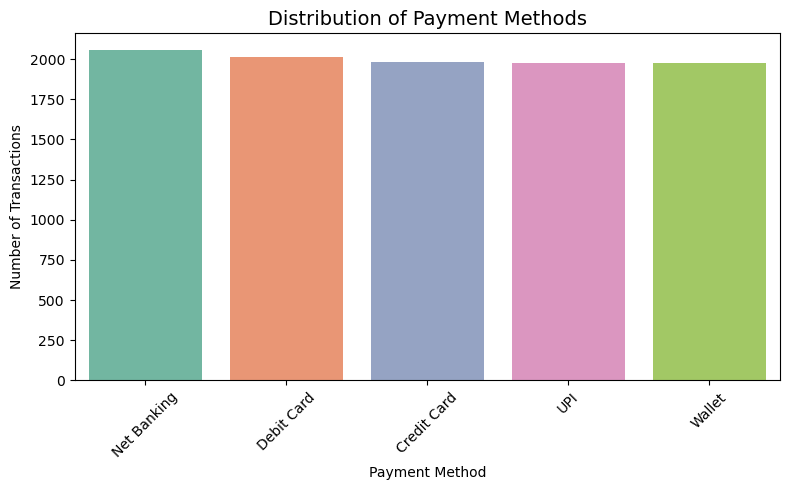

In [86]:
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="Set2")
plt.title("Distribution of Payment Methods", fontsize=14)
plt.xlabel("Payment Method")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_10740\1225055351.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_order_counts.index, y=day_order_counts.values, palette="viridis")


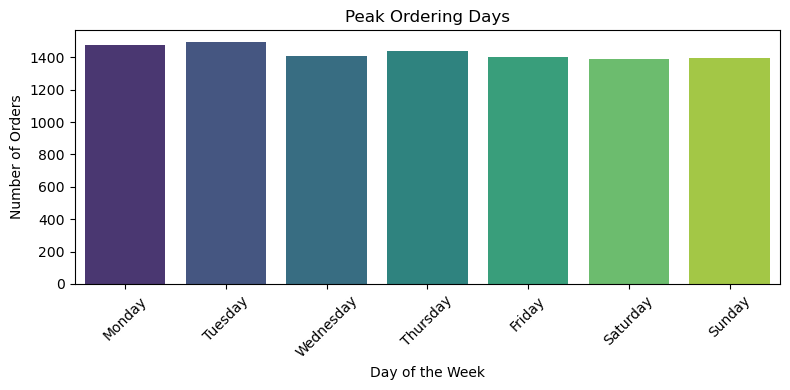

In [88]:
# Peak ordering hours or days (time series or hourly trends)


final_data['Day_of_Week'] = final_data['Order_Date'].dt.day_name()
final_data['Hour'] = final_data['Order_Time'].dt.hour


# 1. Peak Days (Day of Week)

day_order_counts = final_data['Day_of_Week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(8, 4))
sns.barplot(x=day_order_counts.index, y=day_order_counts.values, palette="viridis")
plt.title("Peak Ordering Days")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


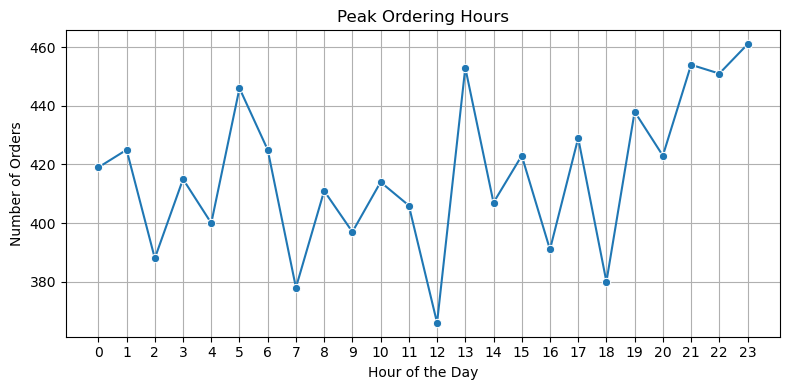

In [92]:
# 2. Peak Hours (Hourly Trend)

hourly_order_counts = final_data['Hour'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
sns.lineplot(x=hourly_order_counts.index, y=hourly_order_counts.values, marker='o')
plt.title("Peak Ordering Hours")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_10740\2000514497.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DP_ID', y='Order_Count', data=top_dp, palette='crest')


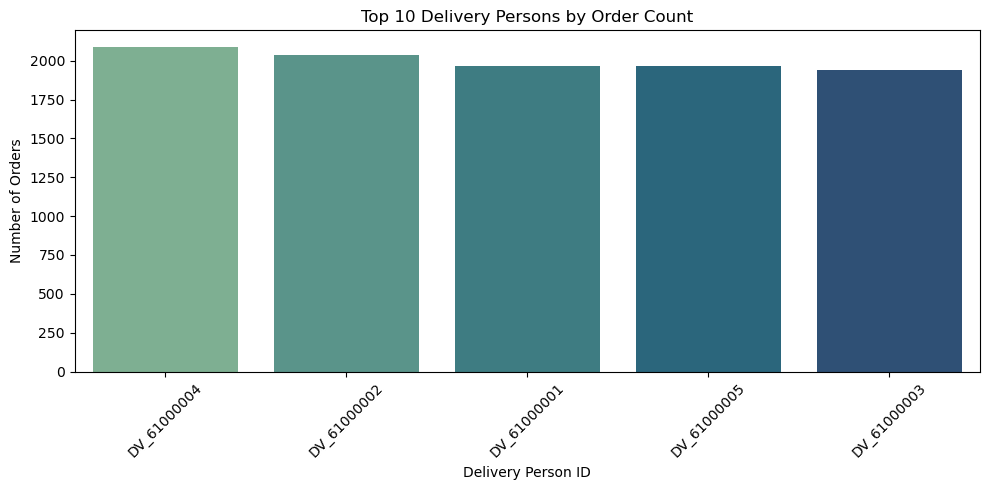

In [113]:
## Order count per delivery person (DP_ID)

dp_order_count = final_data['DP_ID'].value_counts().reset_index()
dp_order_count.columns = ['DP_ID', 'Order_Count']

# Top 10 delivery persons by number of orders
top_dp = dp_order_count.head(10)


plt.figure(figsize=(10, 5))
sns.barplot(x='DP_ID', y='Order_Count', data=top_dp, palette='crest')
plt.title("Top 10 Delivery Persons by Order Count")
plt.xlabel("Delivery Person ID")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_10740\2992254588.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_rewards.index, y=product_rewards.values, palette='magma')


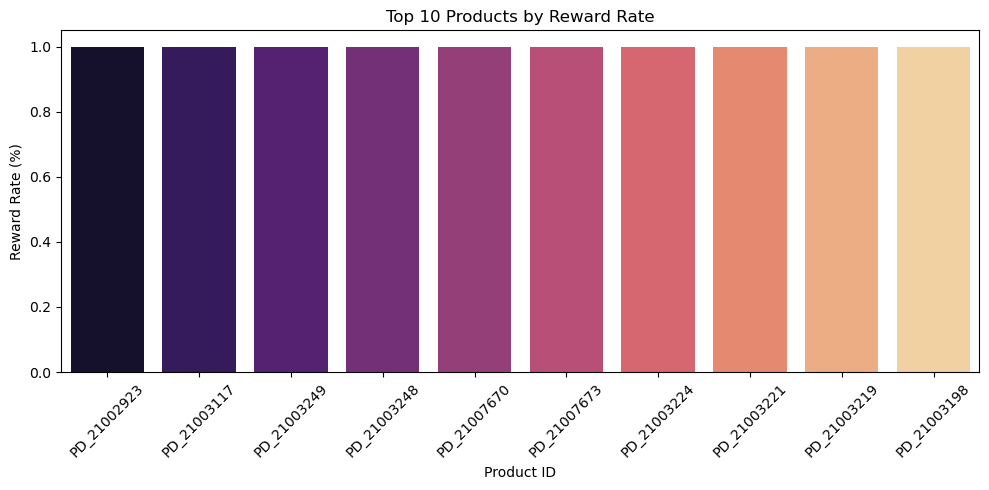

In [115]:
## Reward Trends by Product

product_rewards = final_data.groupby('P_ID')['Reward_Flag'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=product_rewards.index, y=product_rewards.values, palette='magma')
plt.title("Top 10 Products by Reward Rate")
plt.xlabel("Product ID")
plt.ylabel("Reward Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

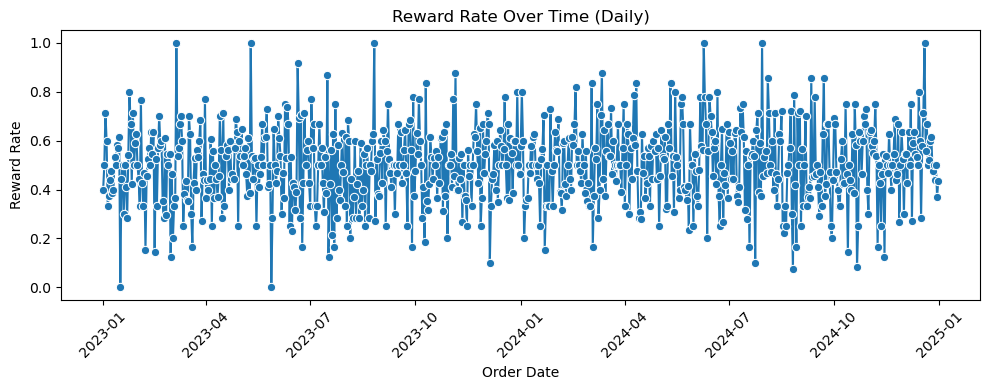

In [117]:
## Reward Trends Over Time

daily_rewards = final_data.groupby('Order_Date')['Reward_Flag'].mean()


plt.figure(figsize=(10, 4))
sns.lineplot(x=daily_rewards.index, y=daily_rewards.values, marker='o')
plt.title("Reward Rate Over Time (Daily)")
plt.xlabel("Order Date")
plt.ylabel("Reward Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()